In [1]:
import yfinance as yf
import pandas as pd
from ray import tune

from statsforecast import StatsForecast
from neuralforecast import NeuralForecast
from neuralforecast.auto import AutoNHITS, AutoLSTM
from neuralforecast.losses.pytorch import MQLoss

from lib.statsforecast import preprocess_yf
from lib.utils import log_returns

In [2]:
data_path = "../data/tests/AAPL_2018-01-01_2022-12-13_1d.pkl"
df = pd.read_pickle(data_path)

ppd = preprocess_yf(df, log_returns)

In [4]:
ppd.loc[:, 'unique_id'] = 'AAPL'

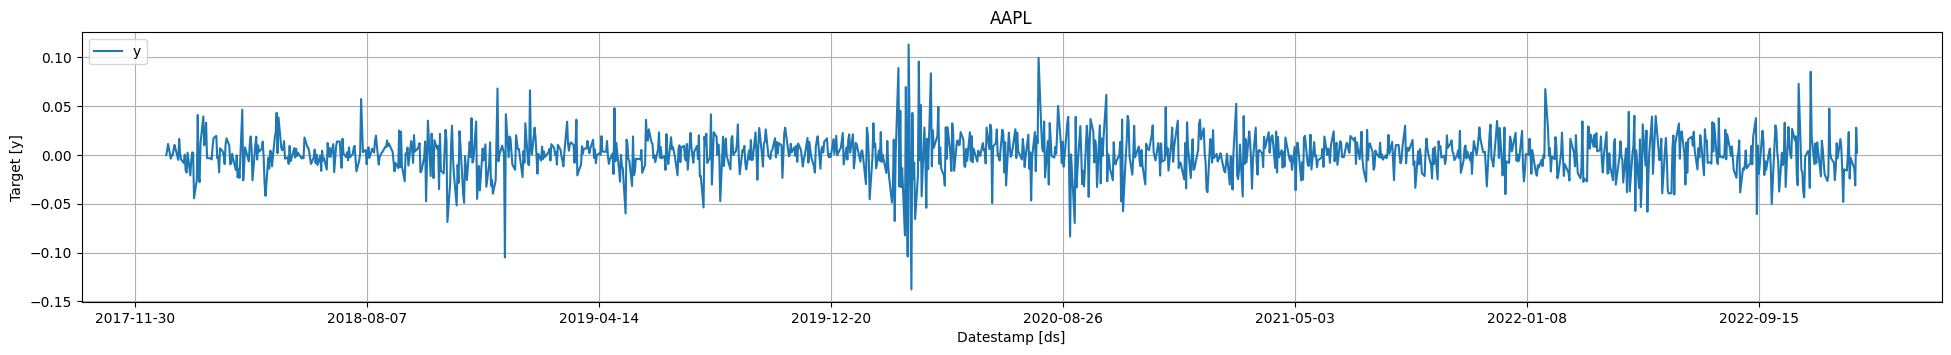

In [6]:
StatsForecast.plot(ppd)

In [3]:
config_nhits = {
    "input_size": tune.choice([48, 48*2, 48*3]),              # Length of input window
    "start_padding_enabled": True,
    "n_blocks": 5*[1],                                              # Length of input window
    "mlp_units": 5 * [[64, 64]],                                  # Length of input window
    "n_pool_kernel_size": tune.choice([5*[1], 5*[2], 5*[4],         
                                      [8, 4, 2, 1, 1]]),            # MaxPooling Kernel size
    "n_freq_downsample": tune.choice([[8, 4, 2, 1, 1],
                                      [1, 1, 1, 1, 1]]),            # Interpolation expressivity ratios
    "learning_rate": tune.loguniform(1e-4, 1e-2),                   # Initial Learning rate
    "scaler_type": tune.choice([None]),                             # Scaler type
    "max_steps": tune.choice([1000]),                               # Max number of training iterations
    "batch_size": tune.choice([1, 4, 10]),                          # Number of series in batch
    "windows_batch_size": tune.choice([128, 256, 512]),             # Number of windows in batch
    "random_seed": tune.randint(1, 20),                             # Random seed
}

config_lstm = {
    "input_size": tune.choice([48, 48*2, 48*3]),              # Length of input window
    "encoder_hidden_size": tune.choice([64, 128]),            # Hidden size of LSTM cells
    "encoder_n_layers": tune.choice([2,4]),                   # Number of layers in LSTM
    "learning_rate": tune.loguniform(1e-4, 1e-2),             # Initial Learning rate
    "scaler_type": tune.choice(['robust']),                   # Scaler type
    "max_steps": tune.choice([500, 1000]),                    # Max number of training iterations
    "batch_size": tune.choice([1, 4]),                        # Number of series in batch
    "random_seed": tune.randint(1, 20),                       # Random seed
}

In [5]:
nf = NeuralForecast(
    models=[
        AutoNHITS(h=48, config=config_nhits, loss=MQLoss(), num_samples=20),
        AutoLSTM(h=48, config=config_lstm, loss=MQLoss(), num_samples=20),
    ],
    freq='H'
)

In [9]:
nf.fit(df=ppd)

(_train_tune pid=30223) Global seed set to 14


Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 69.67it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 67.92it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 68.23it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00, 20.51it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 249: 100%|██████████| 2/2 [00:00<00:00, 69.25it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 299: 100%|██████████| 2/2 [00:00<00:00, 68.15it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 349: 100%|██████████| 2/2 [00:00<00:

(_train_tune pid=30223) Global seed set to 11


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 89.09it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 65.06it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 82.44it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 76.75it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 60.16it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 79.68it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 699: 100%|██████████| 1/1 [00:00<00

(_train_tune pid=30223) Global seed set to 6


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 73.01it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 68.25it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 58.49it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 50.12it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 61.79it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 63.07it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 699: 100%|██████████| 1/1 [00:00<00

(_train_tune pid=30223) Global seed set to 17


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 55.11it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 48.91it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 47.75it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 47.94it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 56.76it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
(_train_tune pid=30223) 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=30223) 
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 248.37it/s]
(_train_tune pid=30

(_train_tune pid=30223) Global seed set to 14


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 69.03it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 66.48it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 66.54it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 40.86it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 64.86it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 539:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]        


2023-10-03 19:46:27,667	WARNING tune.py:194 -- Stop signal received (e.g. via SIGINT/Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C (or send SIGINT/SIGKILL/SIGTERM) to skip. 


Epoch 588:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]        


2023-10-03 19:46:28,421	WARNING tune.py:1158 -- Experiment has been interrupted, but the most recent state was saved.
Resume experiment with: Tuner.restore(path="/Users/beneverman/ray_results/_train_tune_2023-10-03_19-44-53", trainable=...)
2023-10-03 19:46:28,450	WARNING experiment_analysis.py:205 -- Failed to fetch metrics for 15 trial(s):
- _train_tune_78b10_00005: FileNotFoundError('Could not fetch metrics for _train_tune_78b10_00005: both result.json and progress.csv were not found at /Users/beneverman/ray_results/_train_tune_2023-10-03_19-44-53/_train_tune_78b10_00005_5_batch_size=1,input_size=144,learning_rate=0.0007,max_steps=1000,n_freq_downsample=8_4_2_1_1,n_pool_kerne_2023-10-03_19-44-58')
- _train_tune_78b10_00006: FileNotFoundError('Could not fetch metrics for _train_tune_78b10_00006: both result.json and progress.csv were not found at /Users/beneverman/ray_results/_train_tune_2023-10-03_19-44-53/_train_tune_78b10_00006_6_batch_size=1,input_size=144,learning_rate=0.0001,ma

Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 72.24it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 45.02it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]


(_train_tune pid=30223) /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/resource_tracker.py:224: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
(_train_tune pid=30223)   warnings.warn('resource_tracker: There appear to be %d '


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]